1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


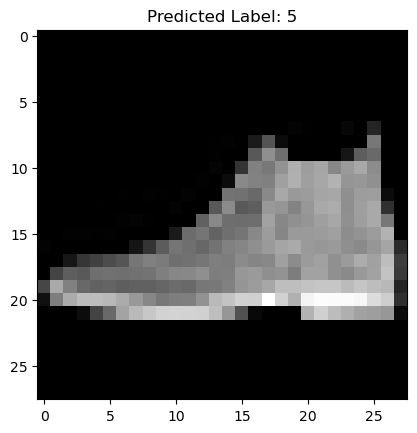

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


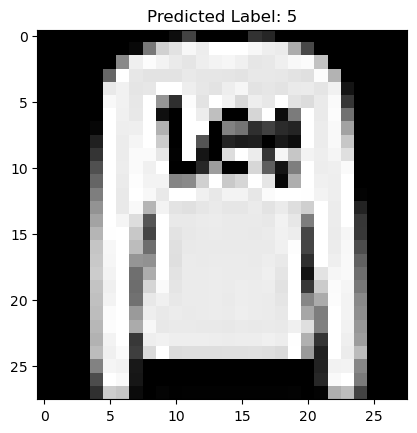

In [1]:
from tensorflow.keras.models import load_model         # Import function to load a pre-trained Keras model
import numpy as np                                    
import matplotlib.pyplot as plt                       

class Predict:
    def __init__(self, model_path):                   # define constructor to initialize prediction class
        self.model = load_model(model_path)           

    def predict_image(self, image):                   # define method to predict the label of a given image
        image = np.expand_dims(image, axis=(0, -1)) / 255.0  # Preprocess the image: expand dimensions and normalize
        predictions = self.model.predict(image)       # predicts probabilities for each class
        return np.argmax(predictions, axis=1)[0]      # Return class index with the highest probability

if __name__ == "__main__":                            # Initiate main block to test the prediction functionality
    from dataset import Dataset                       
    dataset = Dataset()                               
    predictor = Predict("saved_model/fashion_mnist_cnn.keras")  # Load the saved CNN model

    for i in range(2):                                # Predicting labels for 2 test images
        image = dataset.x_test[i]                    # Get a test image
        label = predictor.predict_image(image)       # Predict the label of the test image
        plt.imshow(image.squeeze(), cmap='gray')     # Display the test image in grayscale
        plt.title(f"Predicted Label: {label}")       # Set the title of the plot to the predicted label
        plt.show()                                   # Show the plot